In [1]:
from riskyneuroarousal.utils.load_data import load_pt_results, load_behavioral_data
import seaborn as sns
import matplotlib.pyplot as plt
from riskyneuroarousal.modeling.prospect_theory import (
    get_predicted_output,
)
import numpy as np
from scipy.stats import ttest_ind

In [9]:
pt_params = load_pt_results().query("model == 'model_1' & sub != 56")
behavioral_data = load_behavioral_data(min_RT=0.2)
sub_cond = behavioral_data[["sub", "condition"]].drop_duplicates()

In [11]:
param_dict = {}
for sub in pt_params["sub"].unique():
    sub_pt_params = pt_params.query(f"sub == {sub}")
    param_dict[sub] = [sub_pt_params.query("param_name == 'lambda'")["param_value"].values[0],
                        sub_pt_params.query("param_name == 'rho'")["param_value"].values[0],
                        sub_pt_params.query("param_name == 'mu'")["param_value"].values[0]]


In [12]:
results = get_predicted_output(param_dict, behavioral_data)
results = results.merge(sub_cond, on="sub")

/Users/gustxsr/Documents/Stanford/PoldrackLab/github/riskyneuroarousal/src/riskyneuroarousal/modeling/prospect_theory.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cert"] = 0
/Users/gustxsr/Documents/Stanford/PoldrackLab/github/riskyneuroarousal/src/riskyneuroarousal/modeling/prospect_theory.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cert"] = 0
/Users/gustxsr/Documents/Stanford/PoldrackLab/github/riskyneuroarousal/src/riskyneuroarousal/modeling/prospect_theory.py:100: SettingW

In [ ]:
# Mean accuracy by condition
results.groupby("condition")["predacc"].mean()

condition
equalIndifference    0.903383
equalRange           0.922746
Name: predacc, dtype: float64

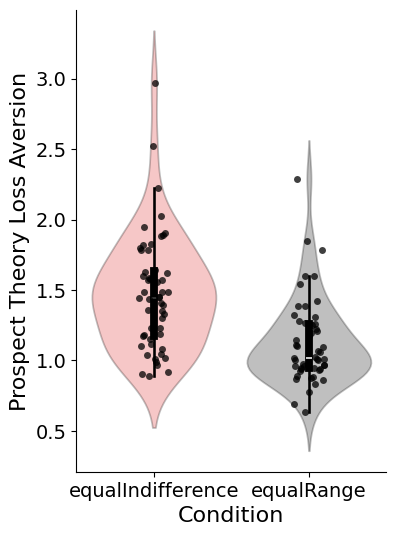

In [23]:
custom_palette = {"equalIndifference": "red", "equalRange": "black"}
fig, ax = plt.subplots(figsize=(4, 6))
sns.violinplot(data=results, x="condition", y="lambda", hue = "condition",  palette=custom_palette, alpha = 0.25)
sns.stripplot(data=results, x="condition", y="lambda", color="black", alpha=0.75)
plt.xlabel("Condition", fontsize=16)
plt.ylabel("Prospect Theory Loss Aversion", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Remove top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

In [24]:
ttest_ind(results.query("condition == 'equalIndifference'")["lambda"].values, results.query("condition == 'equalRange'")["lambda"].values)

TtestResult(statistic=np.float64(5.042429122149875), pvalue=np.float64(1.9308351681917343e-06), df=np.float64(105.0))

Text(0, 0.5, '# of Subjects')

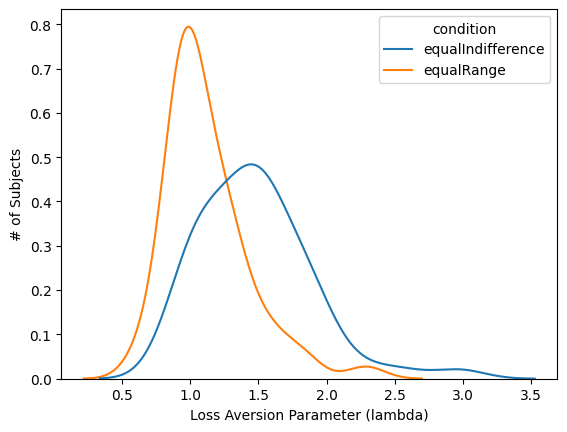

In [21]:
sns.kdeplot(results, x="lambda", hue="condition")
plt.xlabel("Loss Aversion Parameter (lambda)")
plt.ylabel("# of Subjects")